# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The EEG Eye State Dataset](https://www.kaggle.com/datasets/ahmeduzaki/eeg-eye-state-detection-dataset)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

/kaggle/input/eeg-eye-state-detection-dataset/EEG-Eye-State.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('EEG-Eye-State.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,T7,T8,P7,P8,O1,O2,eyeDetection
0,4329.23,4393.85,4289.23,4280.51,4009.23,4635.90,4148.21,4211.28,4350.26,4238.46,4586.15,4222.05,4096.92,4641.03,0
1,4324.62,4384.10,4293.85,4279.49,4004.62,4632.82,4148.72,4207.69,4342.05,4226.67,4586.67,4210.77,4097.44,4638.97,0
2,4327.69,4389.23,4295.38,4282.05,4006.67,4628.72,4156.41,4206.67,4336.92,4222.05,4583.59,4207.69,4096.92,4630.26,0
3,4328.72,4396.41,4296.41,4287.69,4011.79,4632.31,4155.90,4210.77,4343.59,4235.38,4582.56,4217.44,4097.44,4630.77,0
4,4326.15,4398.46,4292.31,4288.21,4011.79,4632.82,4151.28,4212.82,4347.69,4244.10,4586.67,4210.77,4095.90,4627.69,0


## last Five row

In [4]:
df.tail()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,T7,T8,P7,P8,O1,O2,eyeDetection
14975,4281.03,4340.51,4245.64,4269.23,3990.26,4593.33,4116.92,4171.28,4333.85,4221.54,4614.36,4203.08,4074.87,4625.64,1
14976,4276.92,4333.33,4245.13,4259.49,3991.79,4590.26,4110.77,4162.56,4332.82,4217.44,4615.38,4194.36,4073.33,4621.54,1
14977,4277.44,4339.49,4246.67,4257.95,3990.77,4591.79,4113.85,4160.51,4333.33,4212.82,4615.38,4193.33,4072.82,4623.59,1
14978,4284.62,4350.77,4251.28,4267.18,3991.79,4596.41,4122.05,4165.64,4334.36,4220.00,4616.41,4200.00,4080.51,4628.72,1
14979,4287.69,4350.77,4260.00,4274.36,3997.44,4597.95,4121.03,4167.69,4333.33,4226.67,4616.41,4212.31,4088.72,4638.46,1


## Shape of our dataset

In [5]:
df.shape

(14980, 15)

## List out all columns

In [6]:
df.columns

Index(['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'T7', 'T8', 'P7',
       'P8', 'O1', 'O2', 'eyeDetection'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

AF3             float64
AF4             float64
F3              float64
F4              float64
F7              float64
F8              float64
FC5             float64
FC6             float64
T7              float64
T8              float64
P7              float64
P8              float64
O1              float64
O2              float64
eyeDetection      int64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   AF4           14980 non-null  float64
 2   F3            14980 non-null  float64
 3   F4            14980 non-null  float64
 4   F7            14980 non-null  float64
 5   F8            14980 non-null  float64
 6   FC5           14980 non-null  float64
 7   FC6           14980 non-null  float64
 8   T7            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  P7            14980 non-null  float64
 11  P8            14980 non-null  float64
 12  O1            14980 non-null  float64
 13  O2            14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


## Check Null Value

In [9]:
df.isnull().sum()

AF3             0
AF4             0
F3              0
F4              0
F7              0
F8              0
FC5             0
FC6             0
T7              0
T8              0
P7              0
P8              0
O1              0
O2              0
eyeDetection    0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,T7,T8,P7,P8,O1,O2,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4416.435832,4264.022433,4279.232774,4009.767694,4615.205336,4164.946326,4202.456900,4341.741075,4231.316200,4644.022379,4218.826610,4110.400160,4616.056904,0.448798
std,2492.072174,5891.285043,44.428052,41.544312,45.941672,1208.369958,5216.404632,37.785981,34.738821,38.050903,2924.789537,2136.408523,4600.926543,29.292603,0.497388
min,1030.770000,1366.150000,1040.000000,2257.950000,2830.770000,86.666700,2453.330000,3273.330000,2089.740000,1816.410000,2768.210000,1357.950000,2086.150000,4567.180000,0.000000
25%,4280.510000,4342.050000,4250.260000,4267.690000,3990.770000,4590.770000,4108.210000,4190.260000,4331.790000,4220.510000,4611.790000,4190.770000,4057.950000,4604.620000,0.000000
50%,4294.360000,4354.870000,4262.560000,4276.920000,4005.640000,4603.080000,4120.510000,4200.510000,4338.970000,4229.230000,4617.950000,4199.490000,4070.260000,4613.330000,0.000000
75%,4311.790000,4372.820000,4270.770000,4287.180000,4023.080000,4617.440000,4132.310000,4211.280000,4347.180000,4239.490000,4626.670000,4209.230000,4083.590000,4624.100000,1.000000
max,309231.000000,715897.000000,6880.510000,7002.560000,7804.620000,152308.000000,642564.000000,6823.080000,6474.360000,6674.360000,362564.000000,265641.000000,567179.000000,7264.100000,1.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

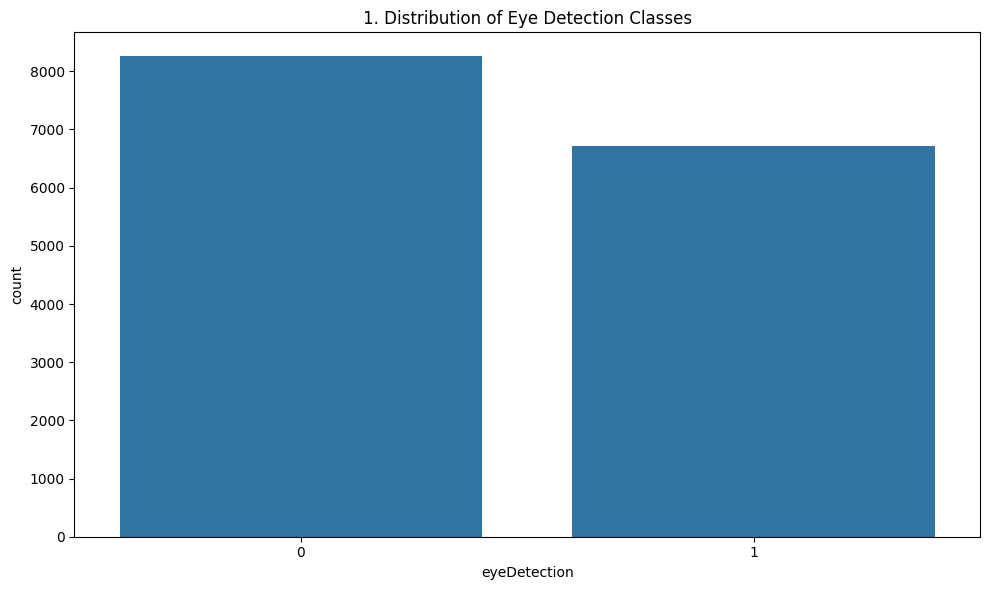

In [13]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='eyeDetection', data=df)
plt.title(f'{plot_no}. Distribution of Eye Detection Classes')
show_fig()
plot_no += 1


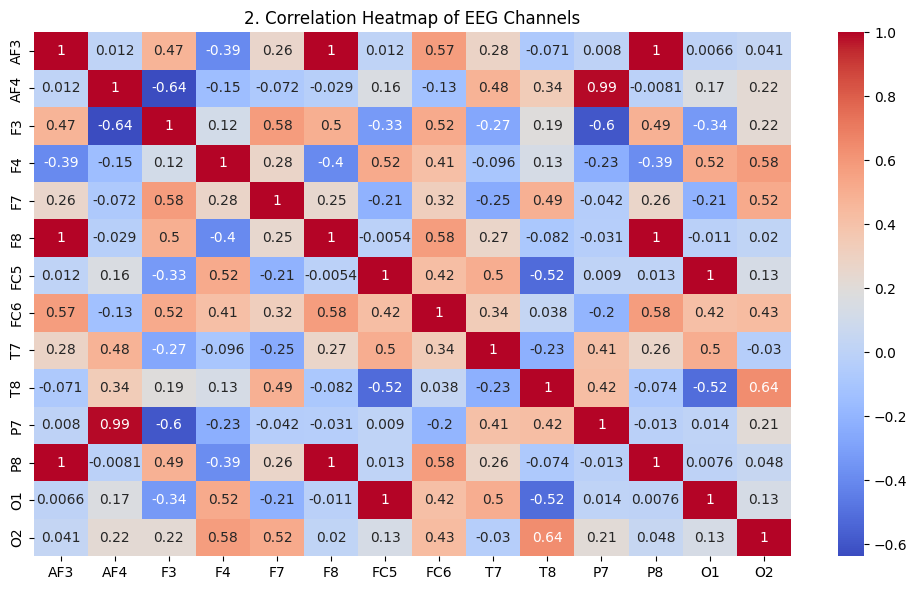

In [14]:
fig = plt.figure(figsize=(10,6))
corr = df.drop(columns='eyeDetection').corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title(f'{plot_no}. Correlation Heatmap of EEG Channels')
show_fig()
plot_no += 1

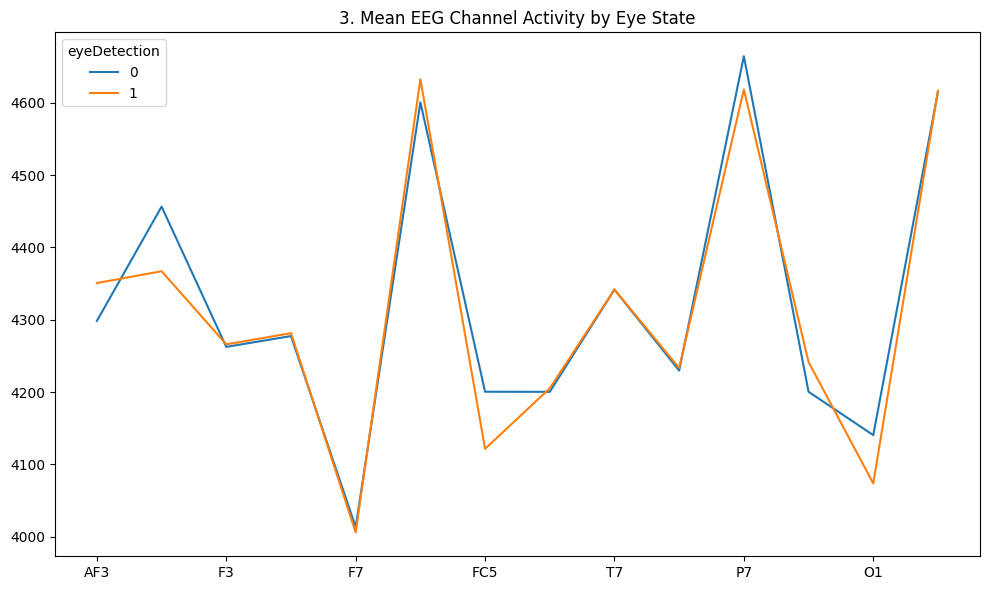

In [15]:
fig = plt.figure(figsize=(10,6))
mean_signals = df.groupby('eyeDetection').mean().T
mean_signals.plot(ax=plt.gca())
plt.title(f'{plot_no}. Mean EEG Channel Activity by Eye State')
show_fig()
plot_no += 1


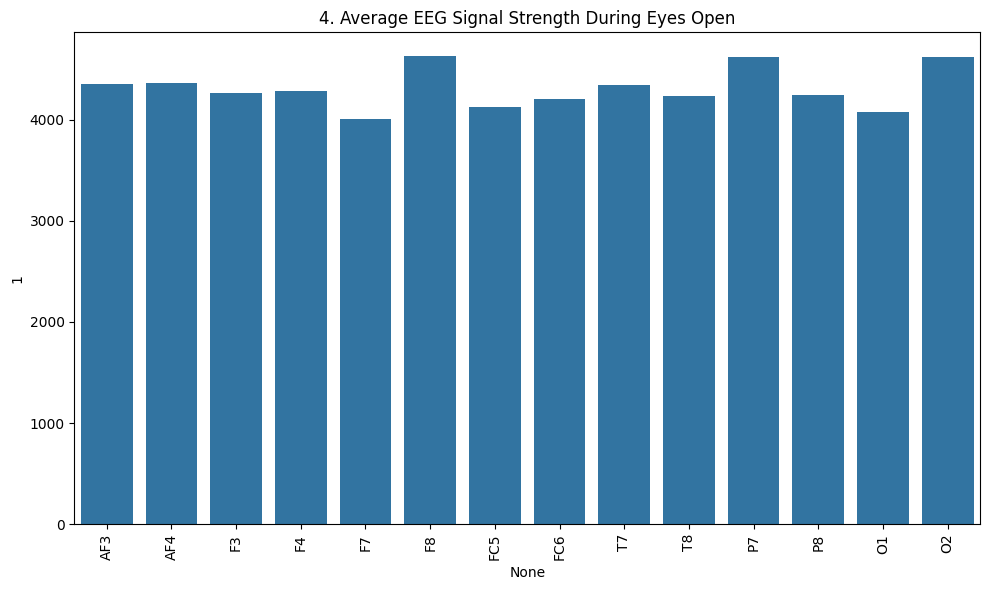

In [16]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x=mean_signals.index, y=mean_signals[1])
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Average EEG Signal Strength During Eyes Open')
show_fig()
plot_no += 1


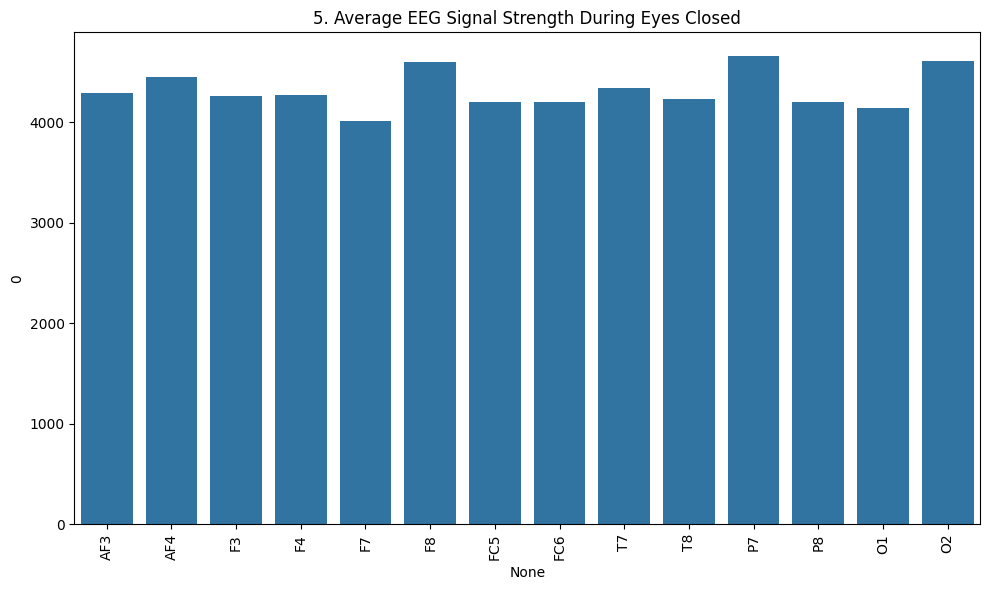

In [17]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x=mean_signals.index, y=mean_signals[0])
plt.xticks(rotation=90)
plt.title(f'{plot_no}. Average EEG Signal Strength During Eyes Closed')
show_fig()
plot_no += 1


# Model Training

## Separate features and target variable

In [18]:
X = df.drop(columns='eyeDetection')
y = df['eyeDetection']

## Split dataset into training and testing sets

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Scale features to improve model performance

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Initialize Logistic Regression model (binary classification)

In [21]:
model = LogisticRegression(max_iter=1000)

## Train the model on training data

In [22]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Predict eye detection on test data

In [23]:
y_pred = model.predict(X_test_scaled)

## Evaluate model performance

Accuracy: 0.5891188251001335


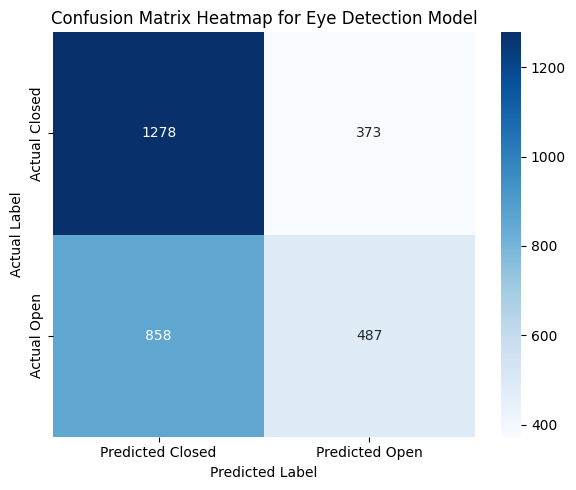

In [24]:
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
fig = plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Closed', 'Predicted Open'],
            yticklabels=['Actual Closed', 'Actual Open'])
plt.title('Confusion Matrix Heatmap for Eye Detection Model')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

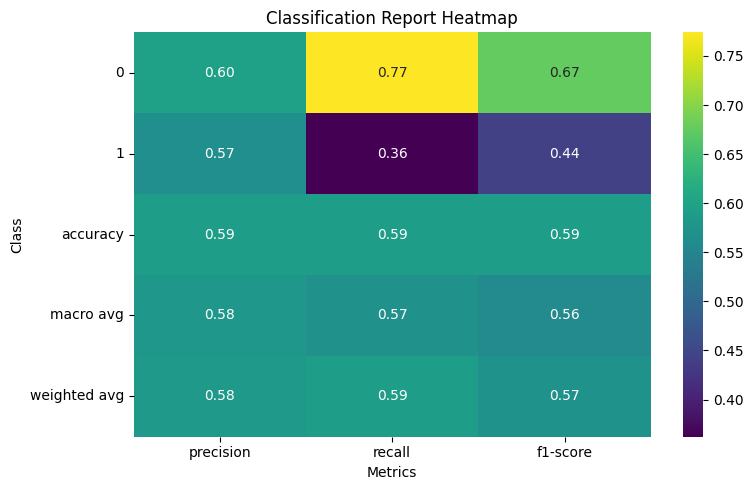

In [25]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T

fig = plt.figure(figsize=(8,5))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']],
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Classification Report Heatmap')
plt.ylabel('Class')
plt.xlabel('Metrics')
plt.tight_layout()
plt.show()